In [1]:
#!pip install analysis-tools
import sys
sys.path.append('../..')

In [2]:
from analysis_tools.common import *

# 1. Load dataset

In [3]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True, data_home='.')
data = pd.concat([X, y], axis='columns')
data_original = copy(data)
target = 'survived'

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


# 2. Set dtypes
- Numerical features: `np.float32`
- Categorical features: `category`

In [5]:
num_features = ['age', 'sibsp', 'parch', 'fare']
cat_features = data.columns.drop(num_features)

data[num_features] = data[num_features].astype(np.float32)
data[cat_features] = data[cat_features].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   category
 1   name       1309 non-null   category
 2   sex        1309 non-null   category
 3   age        1046 non-null   float32 
 4   sibsp      1309 non-null   float32 
 5   parch      1309 non-null   float32 
 6   ticket     1309 non-null   category
 7   fare       1308 non-null   float32 
 8   cabin      295 non-null    category
 9   embarked   1307 non-null   category
 10  boat       486 non-null    category
 11  body       121 non-null    category
 12  home.dest  745 non-null    category
 13  survived   1309 non-null   category
dtypes: category(10), float32(4)
memory usage: 143.8 KB


# 3. Explatory Data Analysis

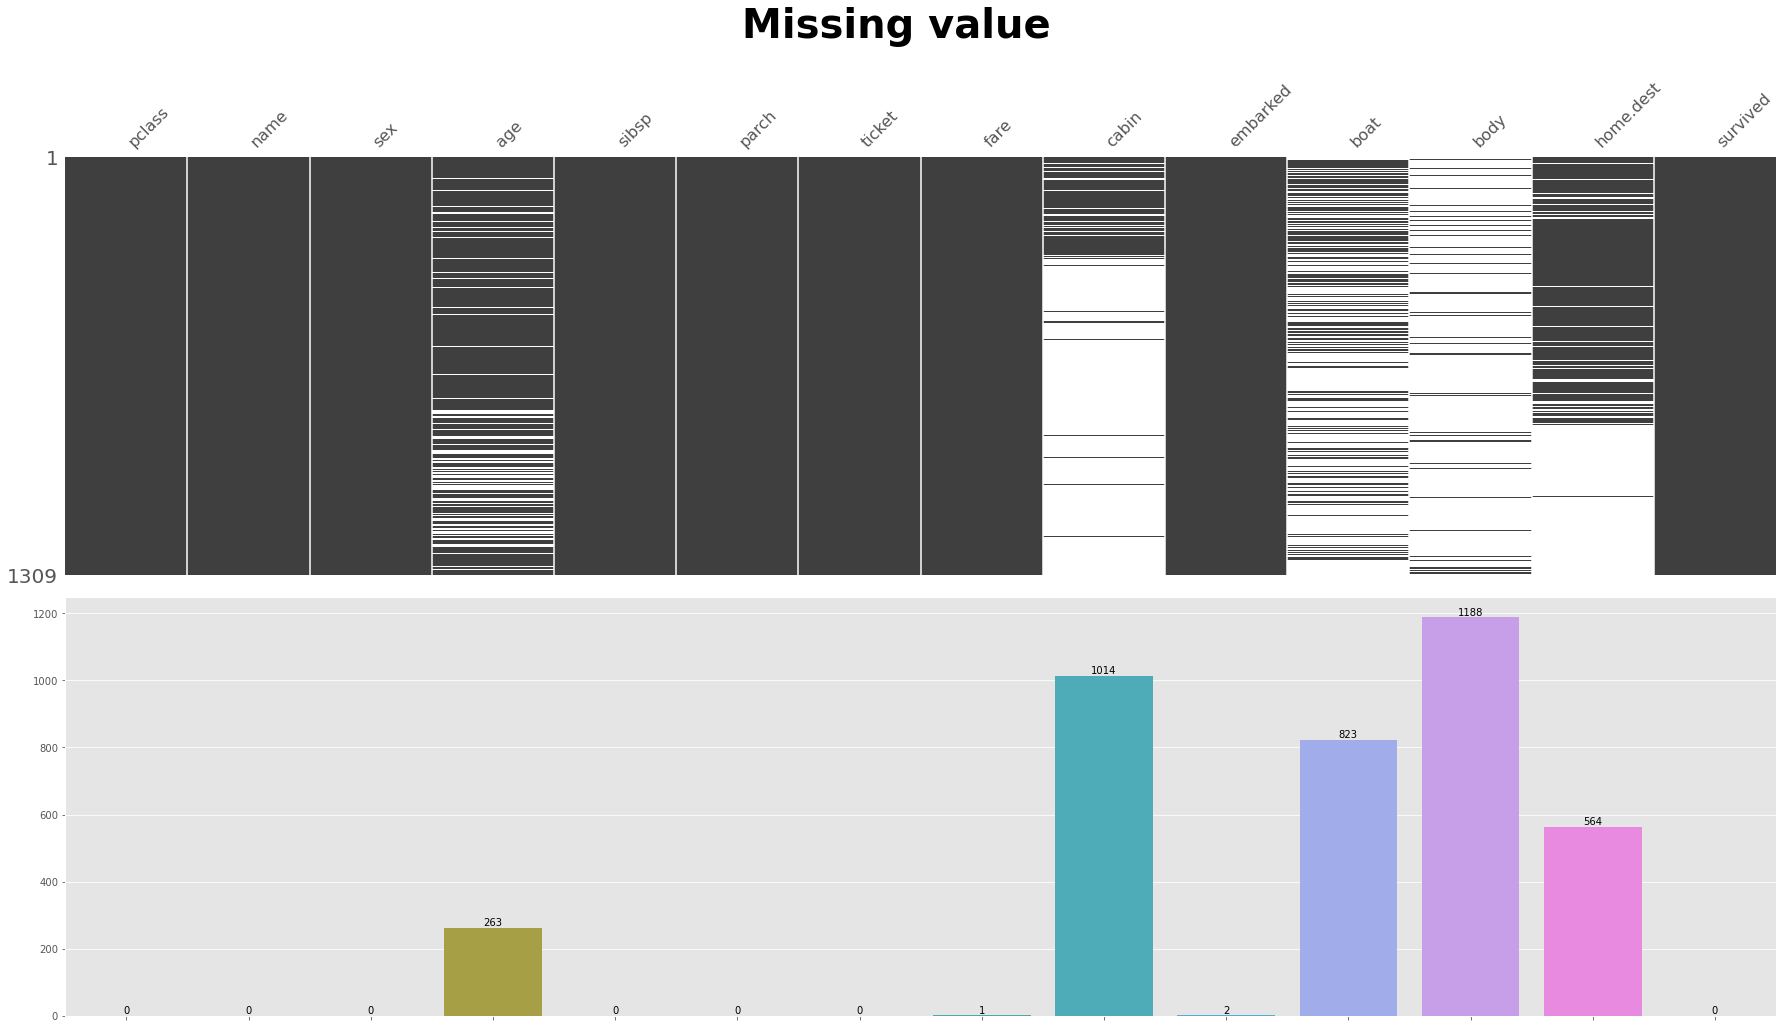

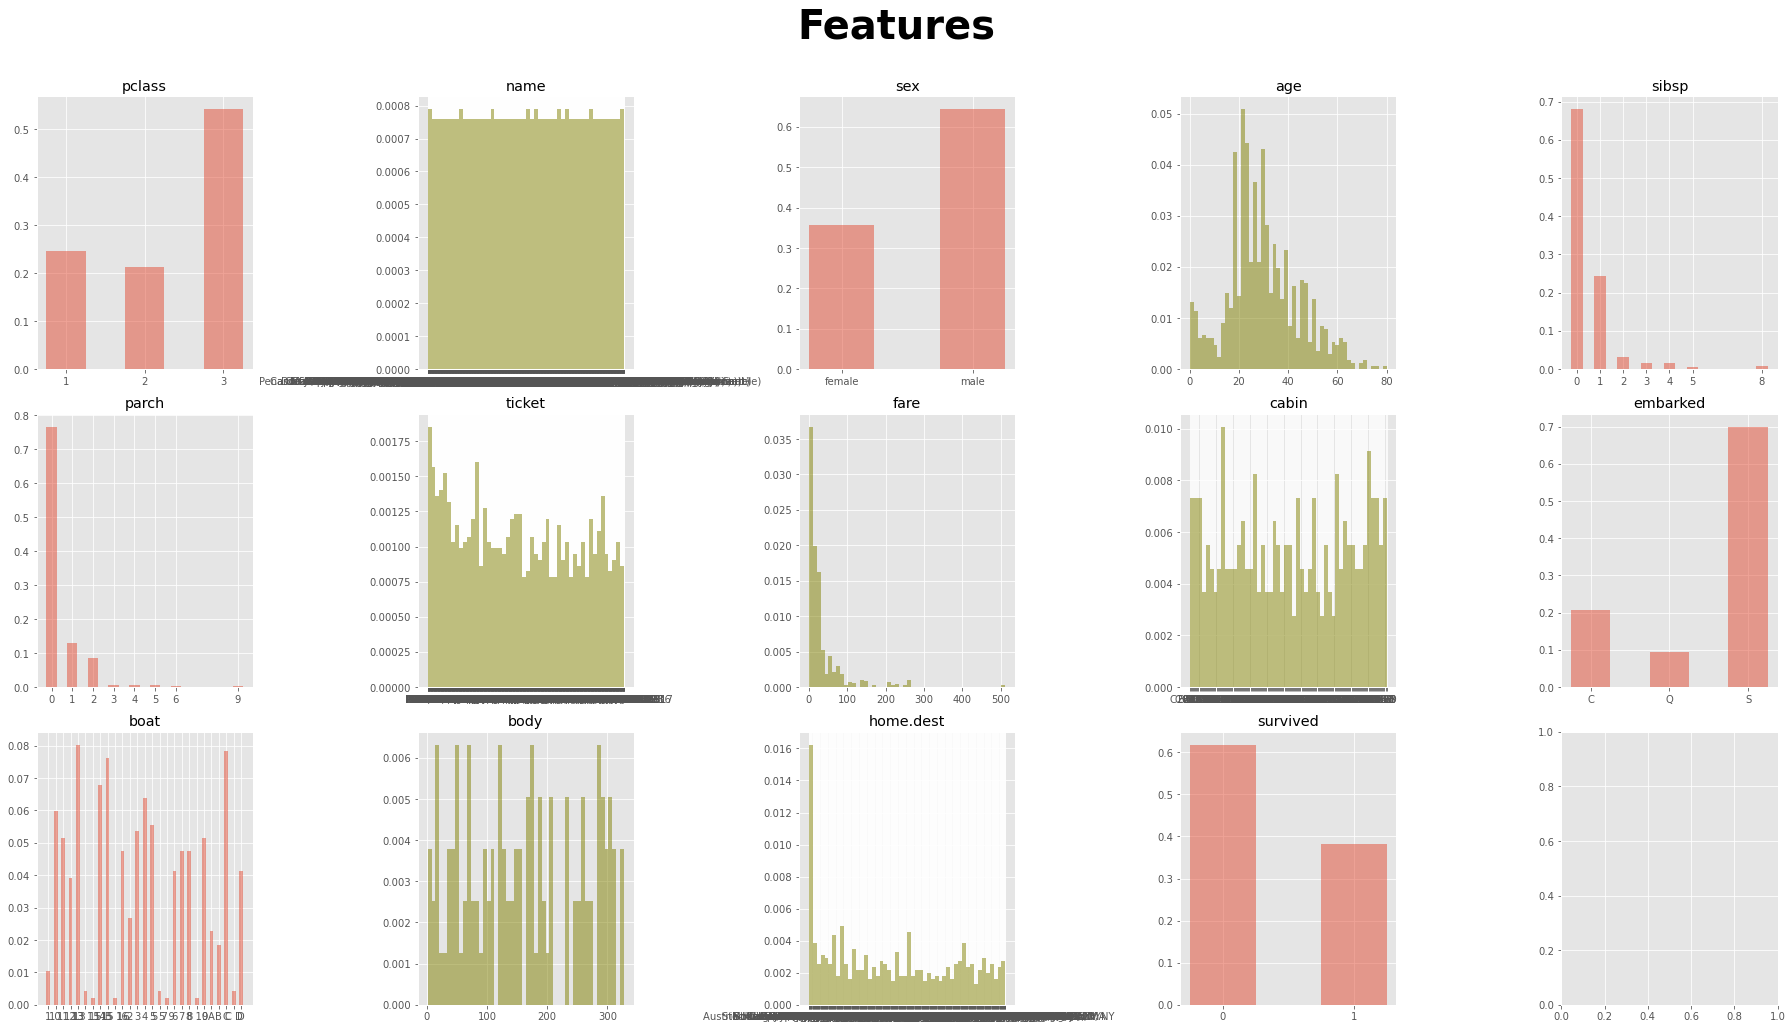

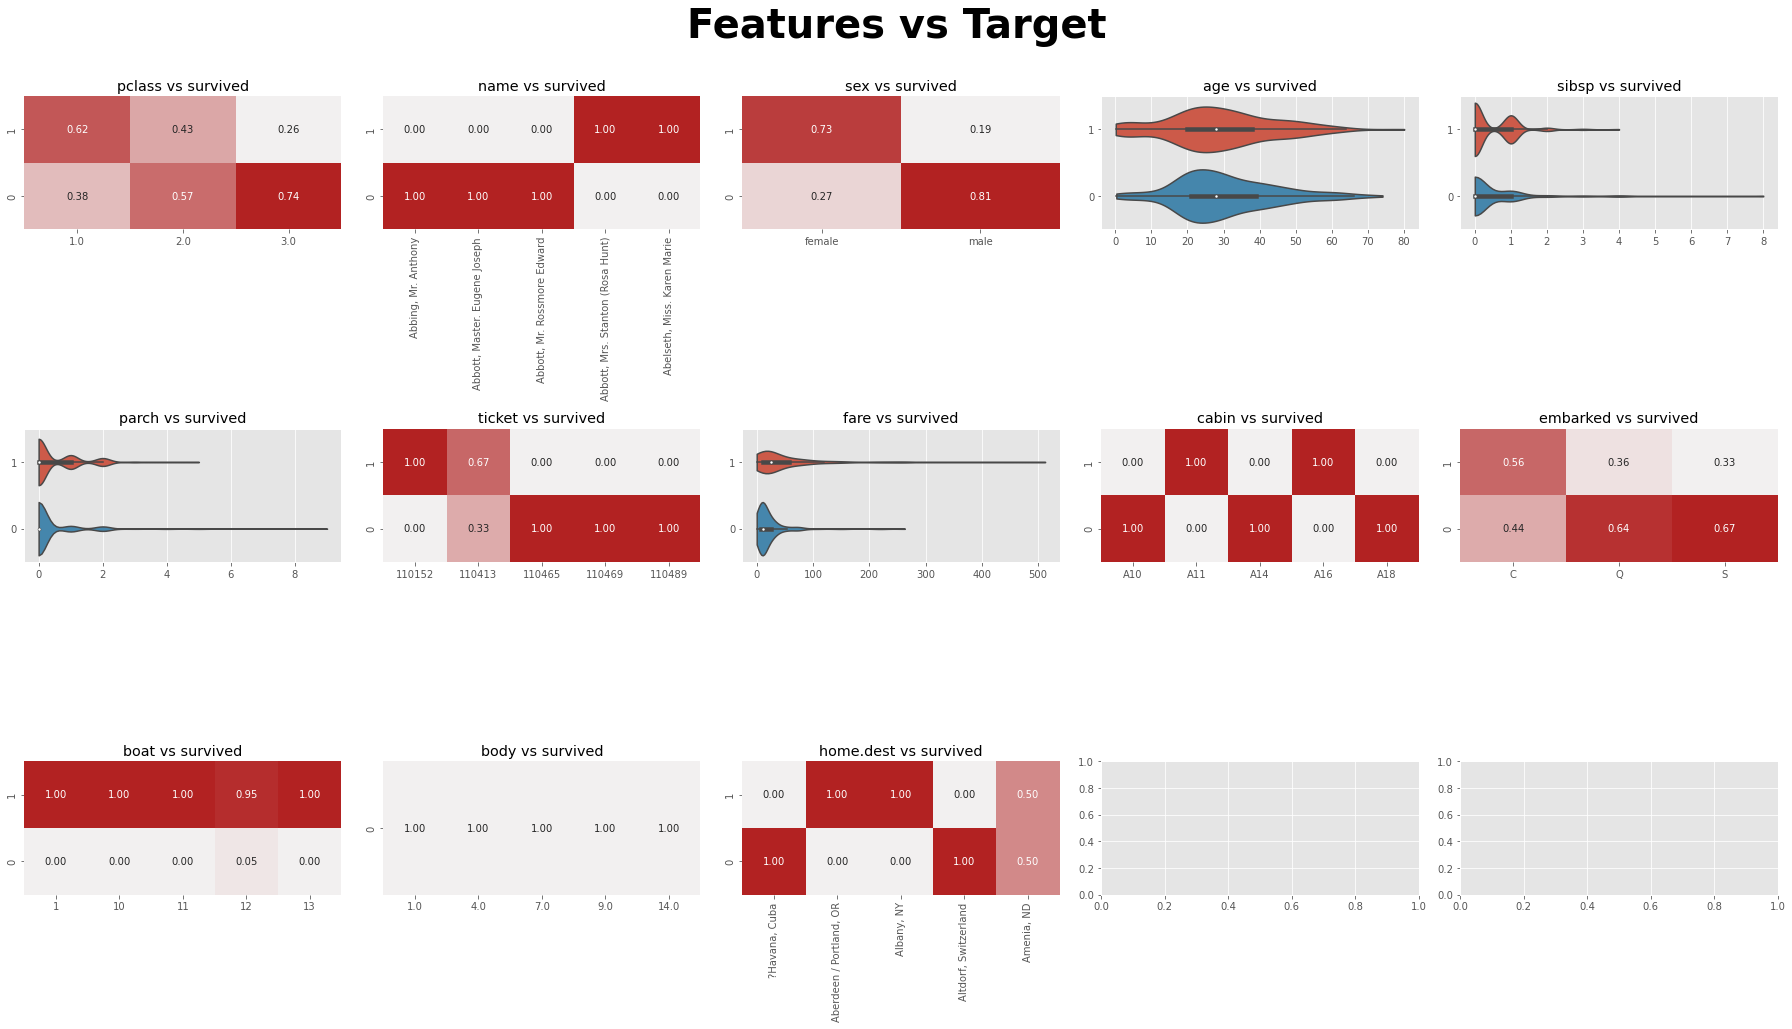

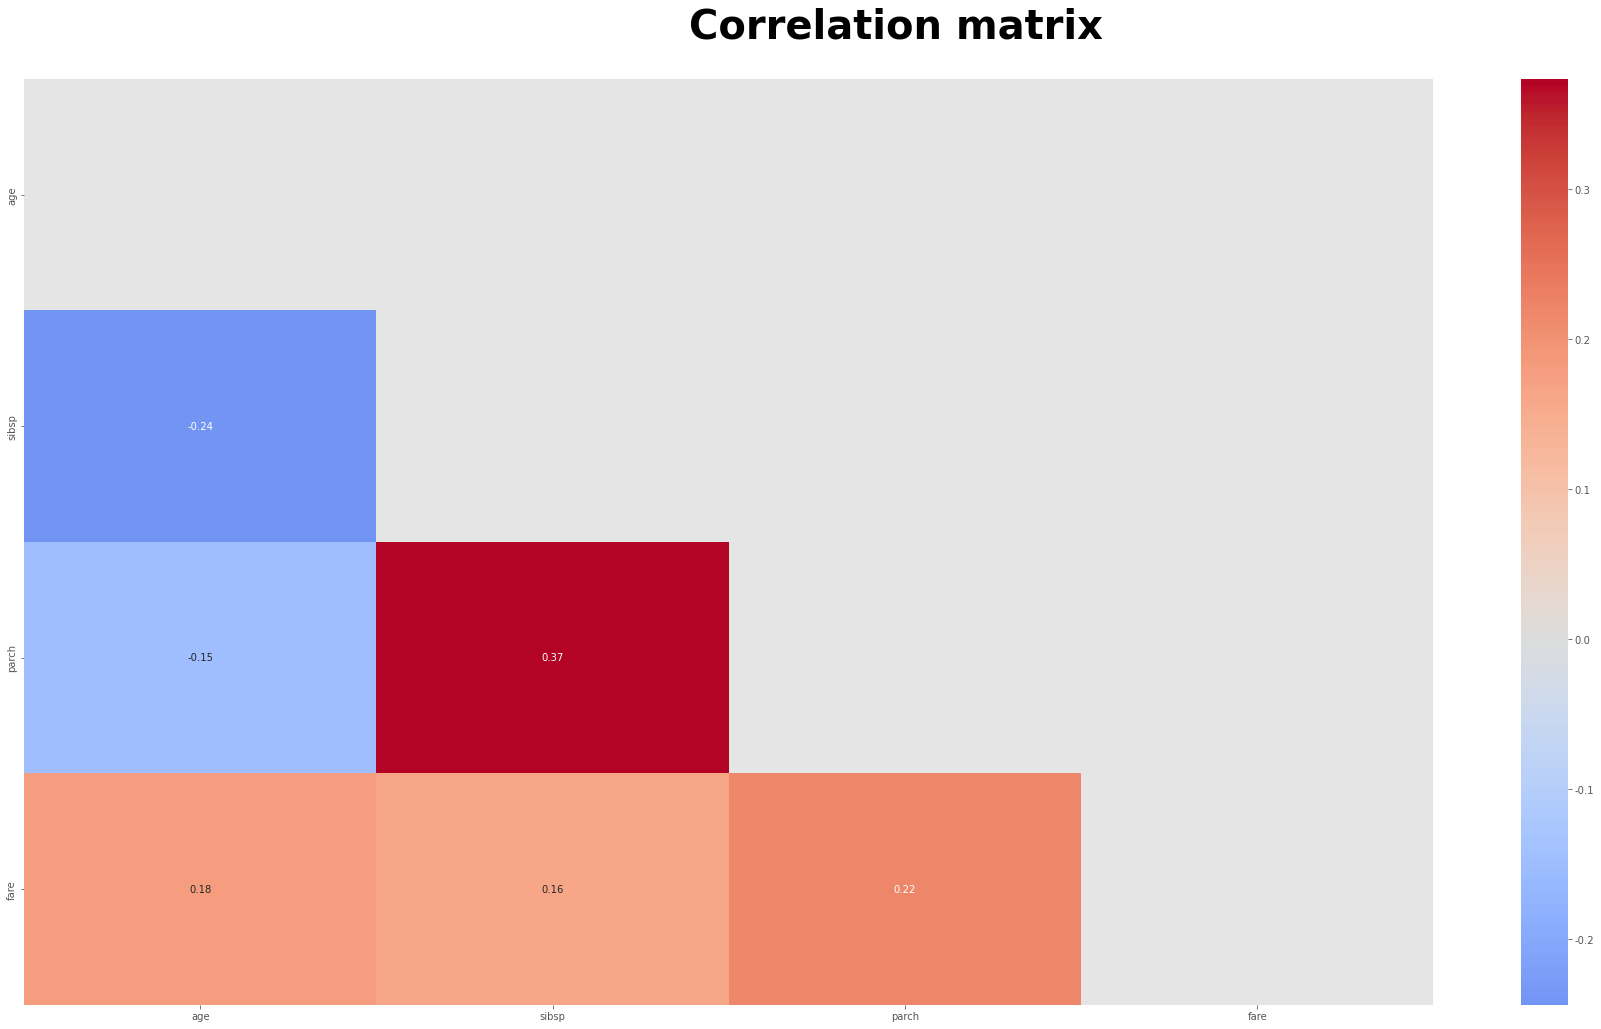

In [6]:
from analysis_tools.eda import *

plot_missing_value(data)
plot_features(data)
plot_features_target(data, target)
plot_corr(data.corr())